# Iris Flower Classification 

### Author : Aditya Prabaswara Mardjikoen

### The Sparks Foundation Internship (April 2021) Task 6 - Prediction using Decision Tree Algorithm

In this classification task we will build a classification model to predict the right class for a flower based on its sepal length, sepal width, petal length, and petal width. First we will import the required Python library and display the first five row in the dataset.

In [1]:
# Imported all required library
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import math
import seaborn as sns
import warnings
from sklearn.cluster import KMeans
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.tree import DecisionTreeClassifier
from scipy import stats
from sklearn import metrics
from sklearn.metrics import classification_report,confusion_matrix
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import plot_confusion_matrix
%matplotlib inline
sns.set_style("whitegrid", {'axes.grid' : False})
warnings.filterwarnings("ignore")

In [2]:
# Display first five row in the data
iris=pd.read_csv('https://raw.githubusercontent.com/aprabaswara/Iris-Flower-Species-Analysis/main/Iris.csv')
iris.head()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa


Next we drop the Id column and split Iris data into two data: training data and test data. In this notebook, 20% of the data become the test data while others become the training data.

In [3]:
# Drop Id column and split the data using train test split
iris = iris.drop('Id',axis=1)
X = iris[['SepalLengthCm','SepalWidthCm','PetalLengthCm','PetalWidthCm']]
y = iris['Species']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20)
dtree = DecisionTreeClassifier()
dtree.fit(X_train,y_train)

DecisionTreeClassifier()

Before we visualize our decision tree, we will evaluate our model first by using our test data. For classification, we use classification report and confusion matrix to evaluate our model.

In [4]:
# Display clasification report on test data
predictions = dtree.predict(X_test)
print(classification_report(y_test,predictions))

                 precision    recall  f1-score   support

    Iris-setosa       1.00      1.00      1.00        10
Iris-versicolor       0.83      1.00      0.91         5
 Iris-virginica       1.00      0.93      0.97        15

       accuracy                           0.97        30
      macro avg       0.94      0.98      0.96        30
   weighted avg       0.97      0.97      0.97        30



From the table above, we can see that our model perfrom very well in classifying the iris flower due to its f1-score above 90%. Now lets take a look on our confussion matrix.

In [5]:
# Create a function to plot iris dataset confusion matrix
def plot_confusion_matrix(cm, classes, normalize=False, title='Confusion matrix',cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    import itertools
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, format(cm[i, j], fmt),
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.ylabel('True label')
    plt.xlabel('Predicted label')
    plt.tight_layout()

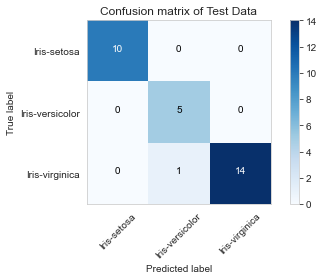

In [19]:
# Plot confusion matrix heatmap by using test data
plot_confusion_matrix(confusion_matrix(y_test,predictions), classes=['Iris-setosa','Iris-versicolor','Iris-virginica'], 
                      title='Confusion matrix of Test Data')

Based on the heatmap above, if we sum all the true predicted value which corresponding to its actual value and calculate its percentage, we can say that our model is correctly classified 97% of the test data. Lets compare it with the training data.

In [18]:
# Display classification report on training data
print(classification_report(y_train,dtree.predict(X_train)))

                 precision    recall  f1-score   support

    Iris-setosa       1.00      1.00      1.00        40
Iris-versicolor       1.00      1.00      1.00        45
 Iris-virginica       1.00      1.00      1.00        35

       accuracy                           1.00       120
      macro avg       1.00      1.00      1.00       120
   weighted avg       1.00      1.00      1.00       120



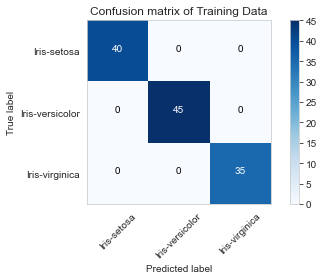

In [20]:
# Plot confussion matrix of training data
plot_confusion_matrix(confusion_matrix(y_train,dtree.predict(X_train)), classes=['Iris-setosa','Iris-versicolor','Iris-virginica'], 
                      title='Confusion matrix of Training Data')

From the classification report and confussion matrix heatmap for the training data, we can see that our model works well on both the training and test data. Subsequently, we will visualize our decision tree by using the code below.

In [13]:
# Import library to visualize decision tree
from IPython.display import Image  
import six
import sys
sys.modules['sklearn.externals.six'] = six
import mlrose
import joblib
sys.modules['sklearn.externals.joblib'] = joblib
from sklearn.tree import export_graphviz
import pydot 

features = list(iris.columns[0:4])
features

['SepalLengthCm', 'SepalWidthCm', 'PetalLengthCm', 'PetalWidthCm']

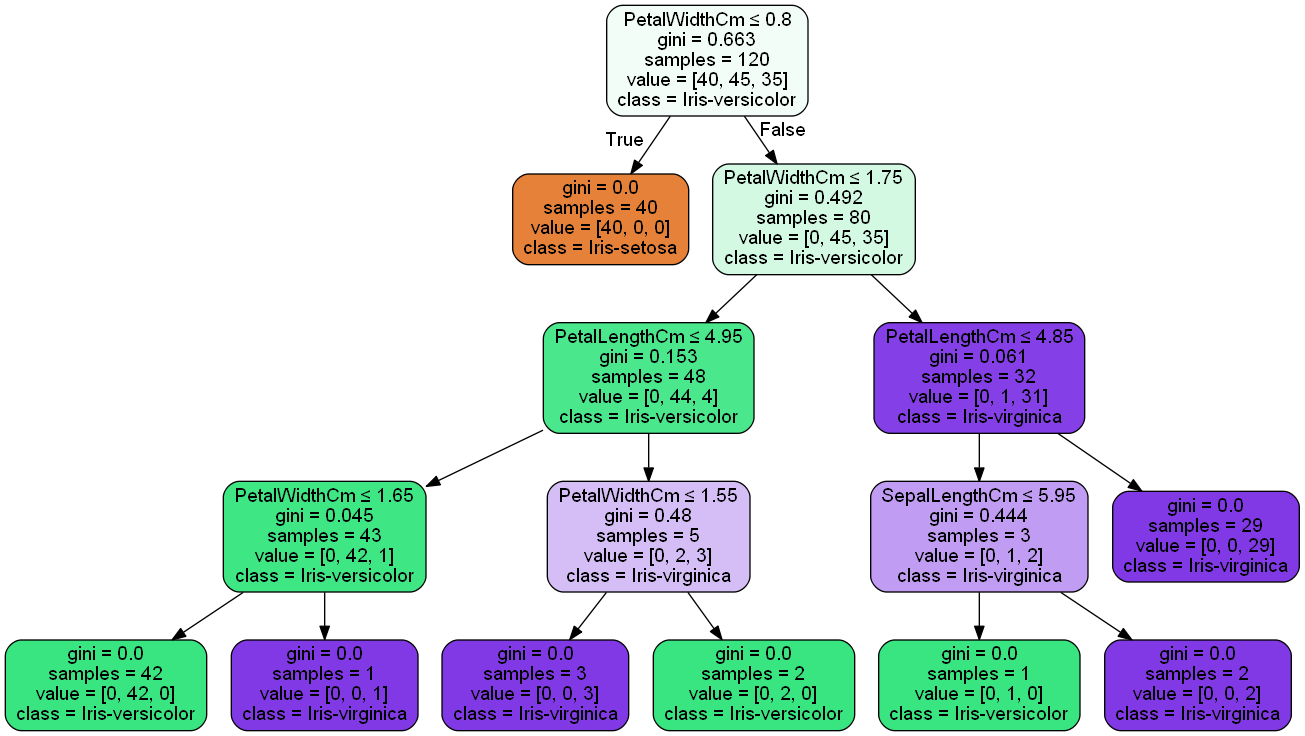

In [16]:
# Import library to visualize decision tree and create its visualization
import io
from io import StringIO
import string
import pandas as pd
#from pandas.compat import StringIO
from collections import Counter

try:
    from StringIO import StringIO
except ImportError:
    from io import StringIO
dot_data = StringIO()  
export_graphviz(dtree, out_file=dot_data,feature_names=features,filled=True,rounded=True, special_characters=True,
                class_names=['Iris-setosa', 'Iris-versicolor','Iris-virginica'])

graph = pydot.graph_from_dot_data(dot_data.getvalue())  
Image(graph[0].create_png())  

Lastly, we will find the most important feature that distinguish each Iris flower by using feature importances.

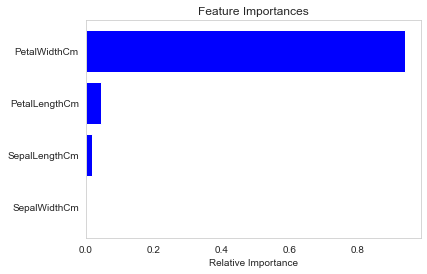

In [17]:
#Find the most important feature that distinguish each Iris flower in Iris dataset
features = X_train
importances = dtree.feature_importances_
indices = np.argsort(importances)

plt.title('Feature Importances')
plt.barh(range(len(indices)), importances[indices], color='b', align='center')
plt.yticks(range(len(indices)), [features.columns[i] for i in indices])
plt.xlabel('Relative Importance')
plt.show()

Based on the feature importances bar chart, we can conclude that the most important feature to classified the Iris flower is the flower petal width.